In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv('E:\My Projects\Chicago Home Price Predictor\Model\data.csv')

In [68]:
data

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


Data Preprocessing

In [69]:
df0 = data.copy(deep=True)

In [70]:
df0[df0['Price'].isna()]

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df0 = df0.drop(156)

In [72]:
df0

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0


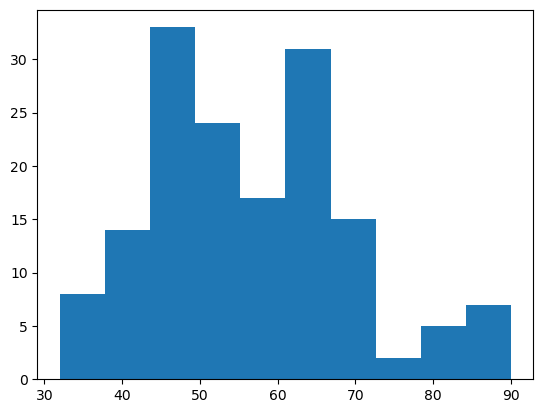

In [73]:
plt.hist(df0.Price.to_numpy())
plt.show()

In [74]:
df0.Price.min()

32.0

In [75]:
df0.Price.max()

90.0

In [76]:
df0.Bedroom.unique()

array([2., 3., 4., 5., 8., 1., 7.])

In [77]:
df0[df0.Bedroom==8]

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
10,85.0,8.0,2240.0,12.0,50.0,1200.0,3.0,2.0,0.0
36,88.0,8.0,2278.0,12.0,50.0,1183.0,3.0,2.0,0.0
88,88.0,8.0,2228.0,12.0,50.0,1208.0,3.0,2.0,0.0
114,90.0,8.0,2293.0,12.0,50.0,1181.0,3.0,2.0,0.0


In [78]:
df0.isna().any()[lambda x: x]

Space    True
Lot      True
Tax      True
dtype: bool

In [79]:
len(df0[df0.Space.isna()])

10

In [80]:
len(df0[df0.Lot.isna()])

10

In [81]:
len(df0[df0.Tax.isna()])

9

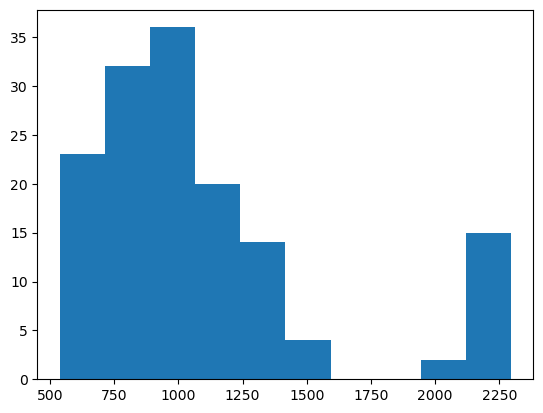

In [82]:
plt.hist(df0.Space.to_numpy())
plt.show()

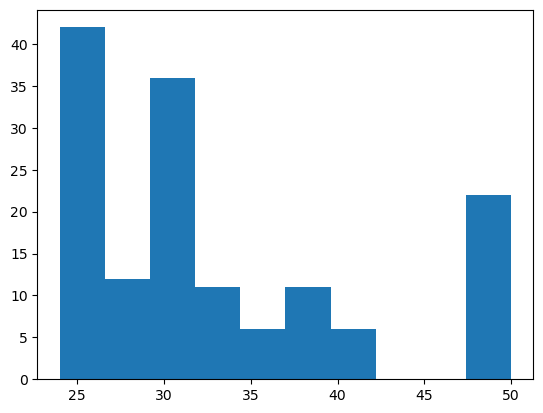

In [83]:
plt.hist(df0.Lot.to_numpy())
plt.show()

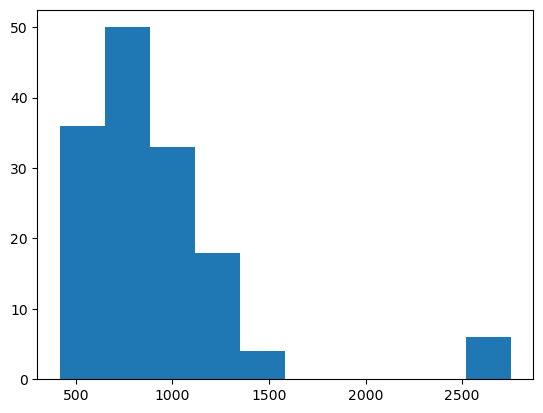

In [84]:
plt.hist(df0.Tax.to_numpy())
plt.show()

In [85]:
df1 = df0.dropna(subset=["Space", "Lot", "Tax"])

In [86]:
len(df1)

128

In [87]:
df1.isna().any()[lambda x: x]

Series([], dtype: bool)

In [88]:
df1

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
149,32.0,4.0,1065.0,7.0,25.0,492.0,1.5,0.0,0.0
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0


In [89]:
df1.Bathroom.unique()

array([1.5, 1. , 2. , 2.5, 3. ])

In [90]:
df1.groupby('Bathroom').count()

,Price,Bedroom,Space,Room,Lot,Tax,Garage,Condition
Bathroom,,,,,,,,
1.0,54,54,54,54,54,54,54,54
1.5,41,41,41,41,41,41,41,41
2.0,21,21,21,21,21,21,21,21
2.5,6,6,6,6,6,6,6,6
3.0,6,6,6,6,6,6,6,6


In [91]:
df1[df1.Bathroom==1].Bedroom.mean()

2.5925925925925926

In [92]:
df1[df1.Bathroom==2].Bedroom.mean()

3.0952380952380953

In [93]:
df1[df1.Bathroom==3].Bedroom.mean()

7.666666666666667

Number of Bathrooms can not be float value like 1.5 and 2.5. 
Assume that number of bathrooms is related with number of bedrooms. Therefore, if a house has 1.5 bathrooms, then check number of bedrooms and if it is less than or equal 3 assume it has 1 bathroom, otherwise 2. 
Likewise, if a house has 2.5 bathrooms, then check number of bedrooms and if it is less than or equal 4 assume it has 2 bathroom, otherwise 3.

In [94]:
df2 = df1.copy(deep=True)

In [95]:
def setBathroom(dataframe):
    if dataframe['Bathroom']==1.5:
        if dataframe['Bedroom'] <= 3:
            return 1
        else:
            return 2
    elif dataframe['Bathroom']==2.5:
        if dataframe['Bedroom'] <= 4:
            return 2
        else:
            return 3
    else:
        return dataframe['Bathroom']

In [96]:
df2['Bathroom'] = df2.apply(setBathroom, axis=1)

In [97]:
df2

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.0,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.0,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.0,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.0,1.5,0.0
...,...,...,...,...,...,...,...,...,...
149,32.0,4.0,1065.0,7.0,25.0,492.0,2.0,0.0,0.0
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0


In [98]:
df2.Bathroom.unique()

array([1., 2., 3.])

In [99]:
df2.Garage.unique()

array([0. , 2. , 1. , 1.5])

In [100]:
len(df2[df2.Garage==1.5])

8

In [101]:
df3 = df2.drop(df2[df2.Garage==1.5].index)

In [102]:
len(df3[df3.Garage==1.5])

0

In [103]:
df3.Garage.unique()

array([0., 2., 1.])

In [104]:
df3

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.0,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.0,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.0,2.0,0.0
5,44.0,4.0,897.0,7.0,25.0,960.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
149,32.0,4.0,1065.0,7.0,25.0,492.0,2.0,0.0,0.0
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0


In [105]:
df3['Total Count'] = df3.apply(lambda row: row['Room'] + row['Bedroom'] + row['Bathroom'] + row['Garage'], axis=1)

In [106]:
df3['CPS'] = df3.apply(lambda row: row['Space']/row['Total Count'], axis=1)

In [107]:
df3.CPS.min()

56.083333333333336

In [108]:
df3.CPS.max()

199.63636363636363

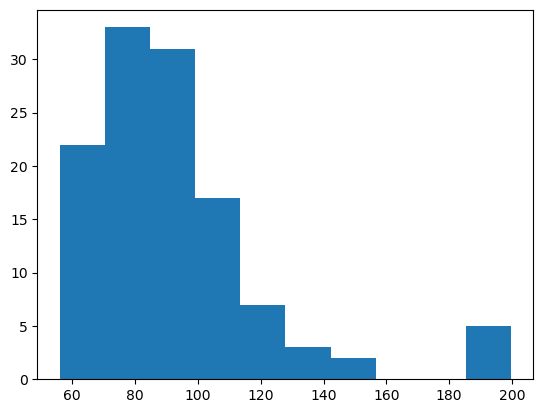

In [109]:
plt.hist(df3.CPS)
plt.show()

Assume that average area of a room should be less that 160. (They consider as  outliers)

In [110]:
df4 = df3.drop(df3[df3.CPS > 160].index)

In [111]:
len(df4)

115

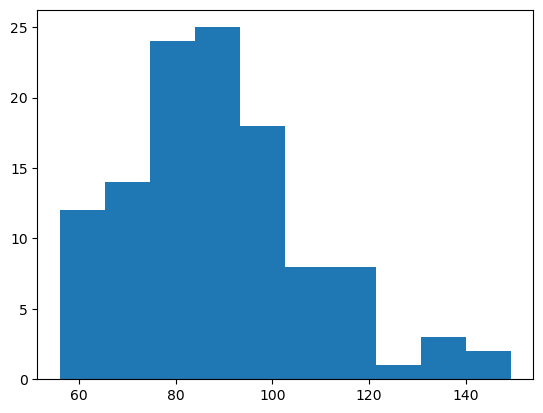

In [112]:
plt.hist(df4.CPS)
plt.show()

In [113]:
df4

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition,Total Count,CPS
0,53.0,2.0,967.0,5.0,39.0,652.0,1.0,0.0,0.0,8.0,120.875000
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0,10.0,81.500000
2,56.0,3.0,900.0,5.0,35.0,897.0,1.0,1.0,0.0,10.0,90.000000
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.0,2.0,0.0,12.0,83.916667
5,44.0,4.0,897.0,7.0,25.0,960.0,2.0,1.0,0.0,14.0,64.071429
...,...,...,...,...,...,...,...,...,...,...,...
149,32.0,4.0,1065.0,7.0,25.0,492.0,2.0,0.0,0.0,13.0,81.923077
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0,9.0,65.000000
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0,9.0,65.888889
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0,12.0,59.666667


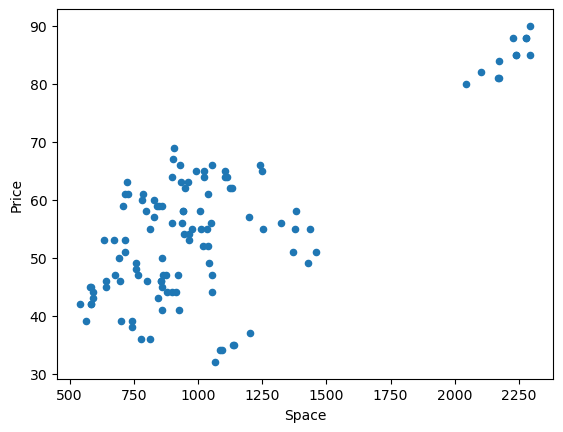

In [114]:
df4.plot(x='Space', y='Price', kind='scatter')
plt.show()

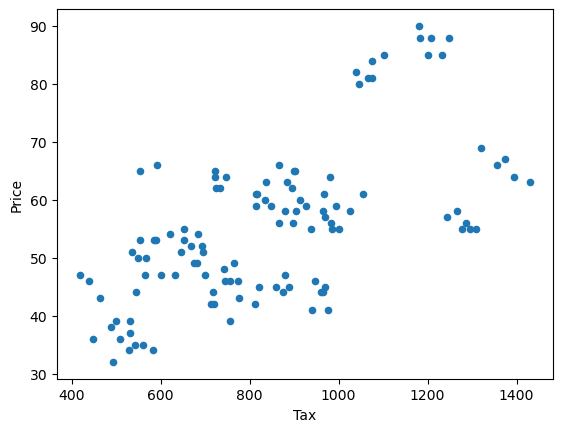

In [115]:
df4.plot(x='Tax', y='Price', kind='scatter')
plt.show()

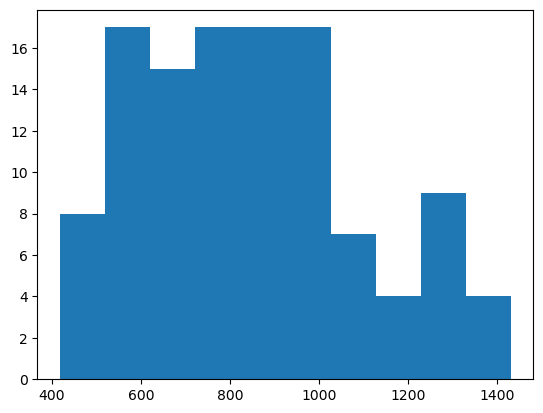

In [116]:
plt.hist(df4.Tax)
plt.show()

Assuming linear regression is the best model for this. 
Train and Test a linear regression model
(After we also check other models and get the decision about the best model)
And also assume Tax and Lot won't affect to the price of the house

In [117]:
X = df4[['Bedroom', 'Space', 'Room', 'Bathroom', 'Garage', 'Condition']]
y = df4.Price

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [119]:
lm = LinearRegression()

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [121]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [122]:
len(X_train)

86

In [123]:
len(X_test)

29

In [124]:
lm.fit(X_train, y_train)

LinearRegression()

In [125]:
lm.score(X_test, y_test)

0.7890204905118219

In [126]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.66780128, 0.82154966, 0.48387566, 0.78057099, 0.76292635])

In [127]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [128]:
find_best_model_using_gridsearchcv(X, y)

C:\Users\Danuka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Danuka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Danuka\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Danuka\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Danuka\anaconda3\Lib\site-pack

,model,best_score,best_params
0,linear_regression,0.703345,{'copy_X': True}
1,lasso,0.694784,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.909961,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In practically, linear regression model gives the best performance in house price predicting problems. But here decision tree gives the best performance. The reason could be the less amount of knowledge about the field in the perprocessing stage. However in here I use decision tree with above parameters as my model.

In [129]:
model = DecisionTreeRegressor(criterion= 'friedman_mse',  splitter= 'random')

In [130]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

In [131]:
model.score(X_test, y_test)

0.926624680289321

Export model to a pickle file

In [132]:
import pickle
with open('Chicago_home_prices_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [133]:
X

,Bedroom,Space,Room,Bathroom,Garage,Condition
0,2.0,967.0,5.0,1.0,0.0,0.0
1,2.0,815.0,5.0,1.0,2.0,1.0
2,3.0,900.0,5.0,1.0,1.0,0.0
3,3.0,1007.0,6.0,1.0,2.0,0.0
5,4.0,897.0,7.0,2.0,1.0,0.0
...,...,...,...,...,...,...
149,4.0,1065.0,7.0,2.0,0.0,0.0
151,3.0,585.0,5.0,1.0,0.0,0.0
153,2.0,593.0,4.0,2.0,1.0,0.0
154,3.0,716.0,6.0,1.0,2.0,1.0


In [134]:
model

DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

In [137]:
model.predict([[1, 1000, 2, 2, 1, 1]])

C:\Users\Danuka\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([69.])